# Lead Scoring Case Study

## Step 1: Importing & Inspecting Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
pd.options.display.max_columns = None

import time
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset

leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Checking Shape

leads.shape

(9240, 37)

In [4]:
# Inspecting numerical columns

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Checking Info

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Checking percentage of null values

round((leads.isnull().sum()/len(leads))*100,2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [7]:
# Replacing all the values in df which have "Select" as NaN
leads = leads.replace('Select', np.nan)

In [8]:
# Checking percentage of null values again
round((leads.isnull().sum()/len(leads))*100,2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [9]:
# Replacing NaN values in Lead Quality column with "Not Sure"
leads['Lead Quality'] = leads['Lead Quality'].replace(np.nan, 'Not Sure')
leads['Lead Quality'].value_counts()

Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [10]:
# Checking percentage of null values again
round((leads.isnull().sum()/len(leads))*100,2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to pay the amount through cheque          0.00
A free cop

In [11]:
# Dropping all columns with more than 30% missing values
for col in leads.columns:
    if (100*(leads[col].isnull().sum()/len(leads.index)) >= 30):
        leads.drop(col, 1, inplace = True)

In [12]:
# Checking percentage of null values again
round((leads.isnull().sum()/len(leads))*100,2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Prospect ID                                       0.00
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Lead Quality                                      0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Advertisement                             0.00
Search                                            0.00
X Educatio

In [13]:
# Looking at dataset
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Low in Relevance,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Not Sure,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Might be,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Not Sure,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Might be,No,No,No,No,Modified


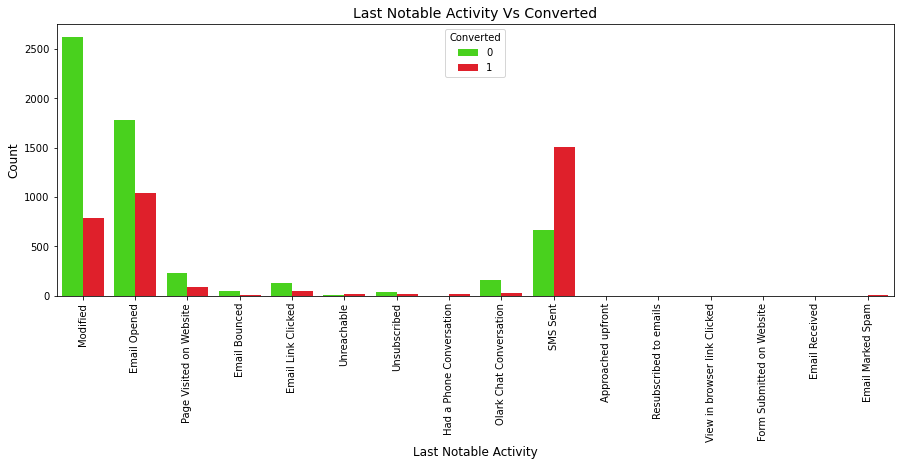

In [14]:
# Last Notable Activity
sns.set_palette(sns.color_palette("prism"))
plt.figure(figsize = (15,5))
sns.countplot(x=leads["Last Notable Activity"], hue = leads["Converted"], data=leads)

plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

#### Inference: ‘Target’ are most likely to convert if they have ‘Opened Email’ and requested ‘Sms’.

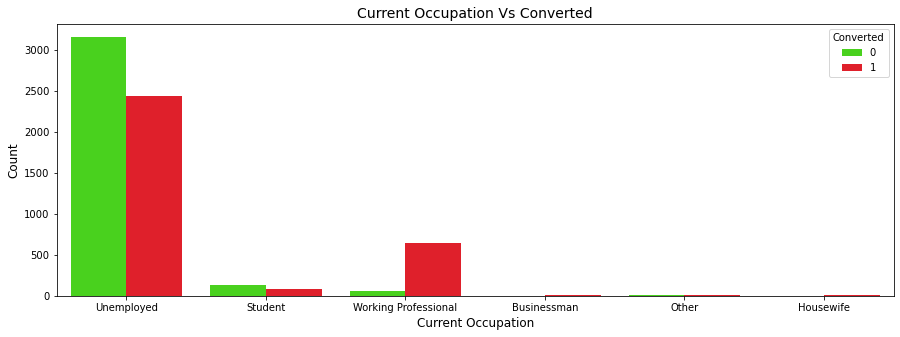

In [15]:
# What is your current occupation
plt.figure(figsize = (15,5))
sns.countplot(x=leads["What is your current occupation"], hue = leads["Converted"], data=leads)

plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

#### `Inference`: Focus more on “Working Professionals” and “Student” as they are more likely to convert while also considering unemployed in mind as well.

In [16]:
# further dropping columns that are redundant and won't help in model building

leads = leads.drop(['What matters most to you in choosing a course','What is your current occupation','Country','Lead Number','Prospect ID','Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Last Notable Activity'], axis=1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Quality,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,No,No,No,No,No,Low in Relevance,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,No,No,No,No,No,Not Sure,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,No,No,No,No,No,No,Might be,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,No,No,No,No,No,Not Sure,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,No,No,No,No,No,Might be,No


In [17]:
# Checking info again
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   Search                                  9240 non-null   object 
 10  Newspaper Article                       9240 non-null   obje

In [18]:
# Checking percentage of null values again
round((leads.isnull().sum()/len(leads))*100,2).sort_values(ascending=False)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Last Activity                             1.11
Lead Source                               0.39
Newspaper Article                         0.00
Lead Quality                              0.00
Through Recommendations                   0.00
Digital Advertisement                     0.00
Newspaper                                 0.00
X Education Forums                        0.00
Lead Origin                               0.00
Search                                    0.00
Total Time Spent on Website               0.00
Converted                                 0.00
Do Not Call                               0.00
Do Not Email                              0.00
A free copy of Mastering The Interview    0.00
dtype: float64

In [19]:
# Some columns have less than 2% NaN values. We will drop their respective rows of NaN values
leads.dropna(subset=['TotalVisits', 'Page Views Per Visit', 'Last Activity','Lead Source'], inplace=True)

In [20]:
# Checking percentage of null values again
round((leads.isnull().sum()/len(leads))*100,2).sort_values(ascending=False)

Lead Origin                               0.0
Search                                    0.0
Lead Quality                              0.0
Through Recommendations                   0.0
Digital Advertisement                     0.0
Newspaper                                 0.0
X Education Forums                        0.0
Newspaper Article                         0.0
Last Activity                             0.0
Lead Source                               0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Call                               0.0
Do Not Email                              0.0
A free copy of Mastering The Interview    0.0
dtype: float64

In [21]:
# Checking Dataset once again
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Quality,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,No,No,No,No,No,Low in Relevance,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,No,No,No,No,No,Not Sure,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,No,No,No,No,No,No,Might be,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,No,No,No,No,No,Not Sure,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,No,No,No,No,No,Might be,No


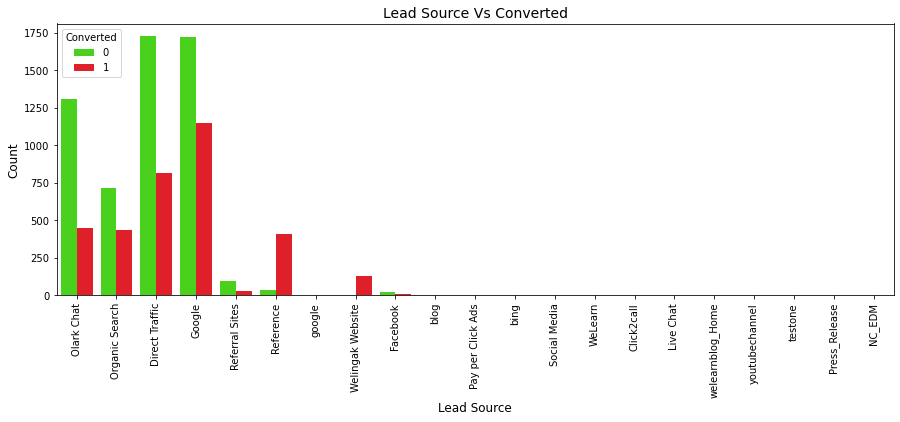

In [22]:
# Lead Source
plt.figure(figsize = (15,5))
sns.countplot(x=leads["Lead Source"], hue = leads["Converted"], data=leads)

plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

#### `Inference`: Conversion rate of 'Organic Search' , 'Google' and 'References' are very high.

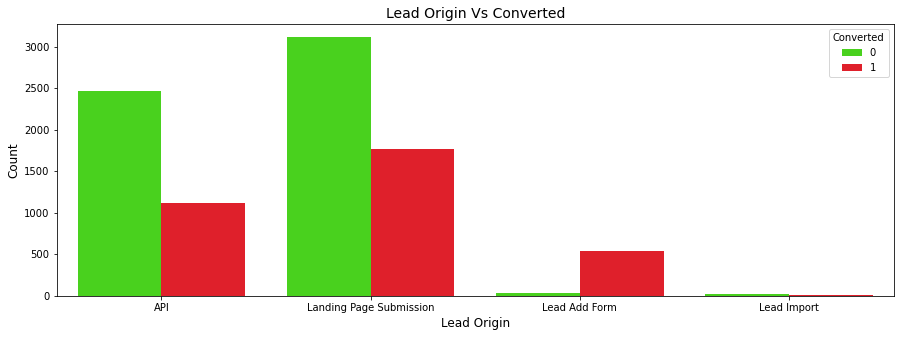

In [23]:
# Lead Origin
plt.figure(figsize = (15,5))
sns.countplot(x=leads["Lead Origin"], hue = leads["Converted"], data=leads)

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

#### `Inferences` : Majority of conversions comes from “Landing page” and Company’s “API”. 

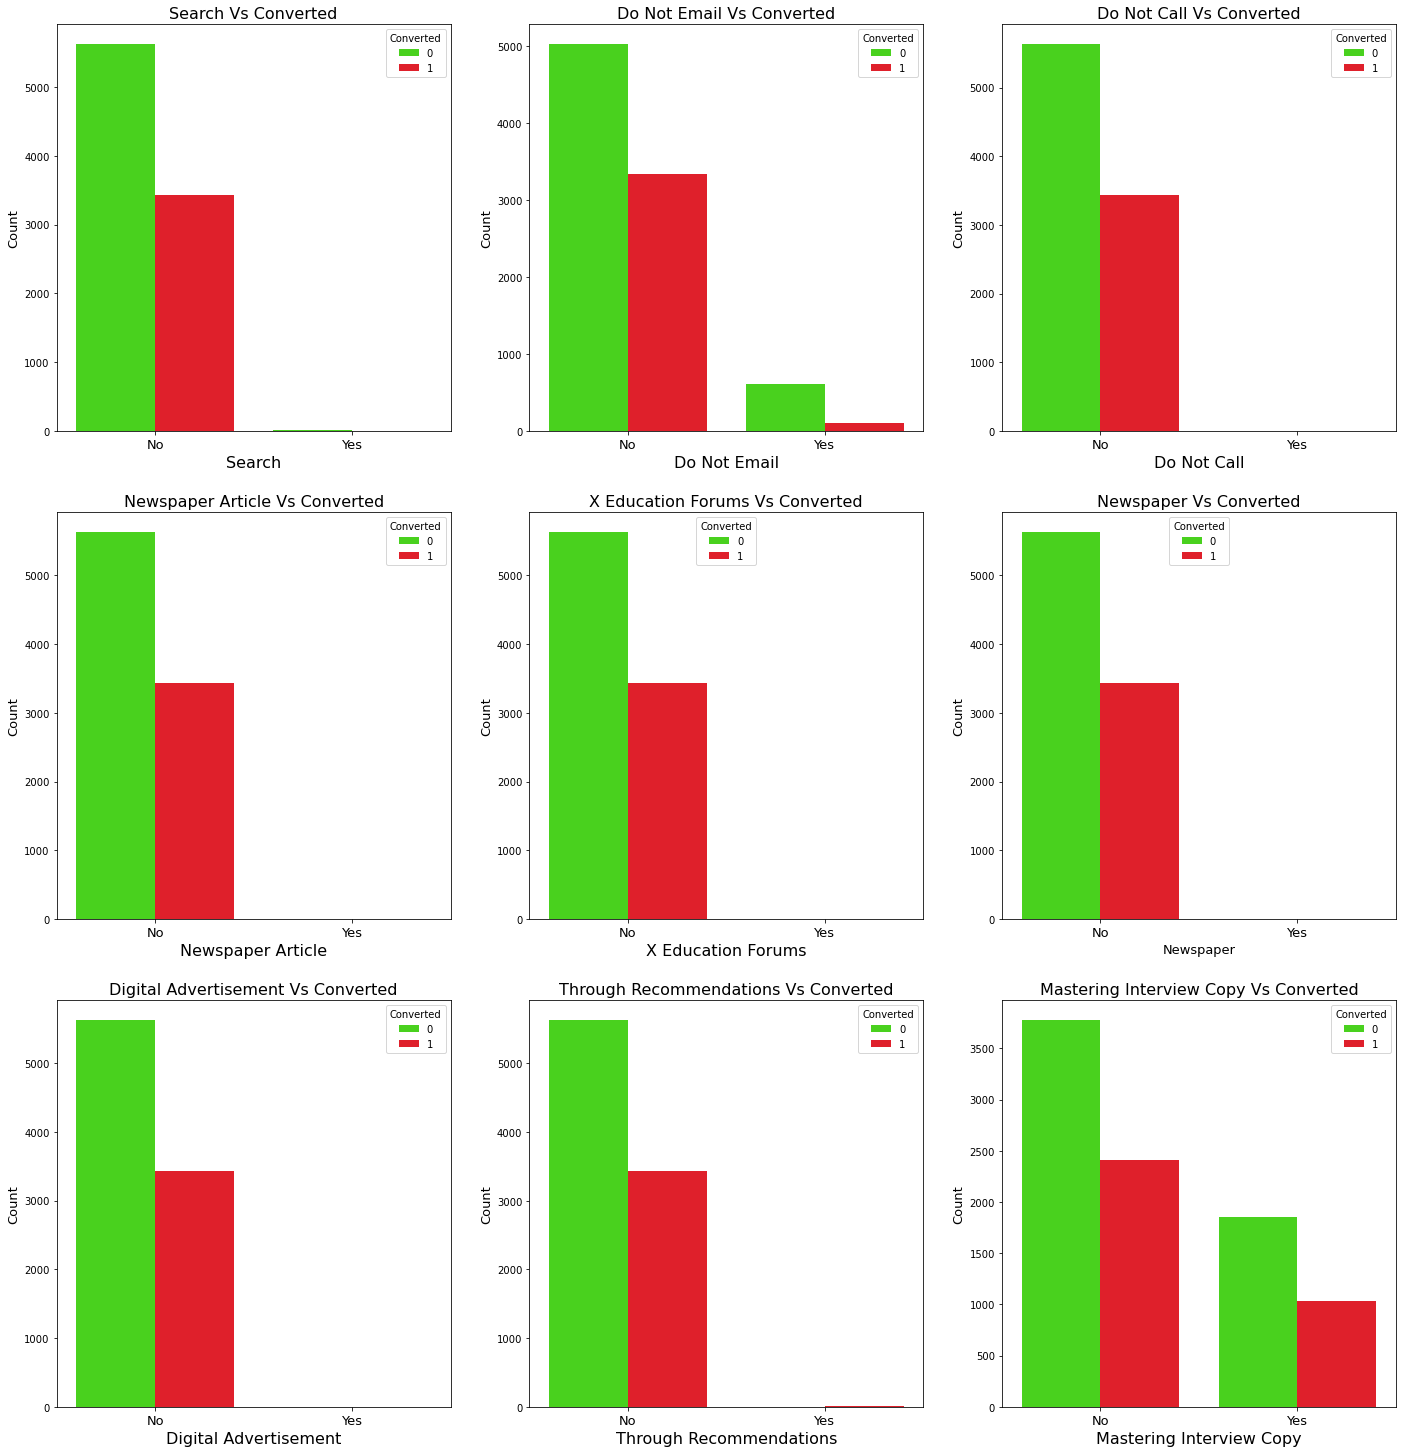

In [24]:
plt.figure(figsize=(24,12))
plt.subplots_adjust(left=None, bottom=3.4, right=None, top=5, wspace=None, hspace=None)

# Search
plt.subplot(3, 3, 1)
sns.countplot(x=leads["Search"], hue = leads["Converted"], data=leads)
plt.title('Search Vs Converted', fontsize = 16)
plt.xlabel("Search", fontsize = 16)
plt.ylabel("Count", fontsize = 13)
plt.xticks(fontsize = 13)

# Do not Email
plt.subplot(3, 3, 2)
sns.countplot(x=leads["Do Not Email"], hue = leads["Converted"], data=leads)
plt.title('Do Not Email Vs Converted', fontsize = 16)
plt.xlabel("Do Not Email", fontsize = 16)
plt.ylabel("Count", fontsize = 13)
plt.xticks(fontsize = 13)

# Do not Call
plt.subplot(3, 3, 3)
sns.countplot(x=leads["Do Not Call"], hue = leads["Converted"], data=leads)
plt.title('Do Not Call Vs Converted', fontsize = 16)
plt.xlabel("Do Not Call", fontsize = 16)
plt.ylabel("Count", fontsize = 13)
plt.xticks(fontsize = 13)

# Newspaper Article
plt.subplot(3, 3, 4)
sns.countplot(x=leads["Newspaper Article"], hue = leads["Converted"], data=leads)
plt.title('Newspaper Article Vs Converted', fontsize = 16)
plt.xlabel("Newspaper Article", fontsize = 16)
plt.ylabel("Count", fontsize = 13)
plt.xticks(fontsize = 13)

# X Education Forums
plt.subplot(3, 3, 5)
sns.countplot(x=leads["X Education Forums"], hue = leads["Converted"], data=leads)
plt.title('X Education Forums Vs Converted', fontsize = 16)
plt.xlabel("X Education Forums", fontsize = 16)
plt.ylabel("Count", fontsize = 13)
plt.xticks(fontsize = 13)

# Newspaper
plt.subplot(3, 3, 6)
sns.countplot(x=leads["Newspaper"], hue = leads["Converted"], data=leads)
plt.title('Newspaper Vs Converted', fontsize = 16)
plt.xlabel("Newspaper", fontsize = 13)
plt.ylabel("Count", fontsize = 13)
plt.xticks(fontsize = 13)

# Digital Advertisement
plt.subplot(3, 3, 7)
sns.countplot(x=leads["Digital Advertisement"], hue = leads["Converted"], data=leads)
plt.title('Digital Advertisement Vs Converted', fontsize = 16)
plt.xlabel("Digital Advertisement", fontsize = 16)
plt.ylabel("Count", fontsize = 13)
plt.xticks(fontsize = 13)

# Through Recommendations
plt.subplot(3, 3, 8)
sns.countplot(x=leads["Through Recommendations"], hue = leads["Converted"], data=leads)
plt.title('Through Recommendations Vs Converted', fontsize = 16)
plt.xlabel("Through Recommendations", fontsize = 16)
plt.ylabel("Count", fontsize = 13)
plt.xticks(fontsize = 13)

# A free copy of Mastering The Interview
plt.subplot(3, 3, 9)
sns.countplot(x=leads["A free copy of Mastering The Interview"], hue = leads["Converted"], data=leads)
plt.title('Mastering Interview Copy Vs Converted', fontsize = 16)
plt.xlabel("Mastering Interview Copy", fontsize = 16)
plt.ylabel("Count", fontsize = 13)
plt.xticks(fontsize = 13)

plt.show()

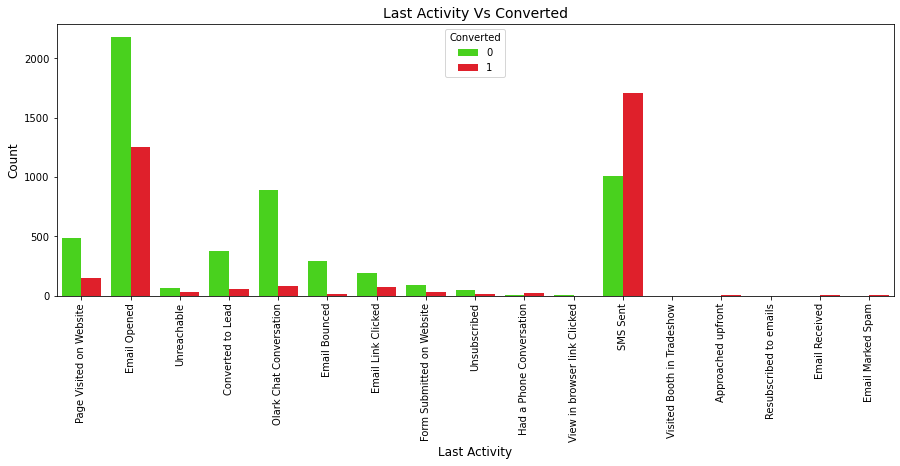

In [25]:
# Last Activity
plt.figure(figsize = (15,5))
sns.countplot(x=leads["Last Activity"], hue = leads["Converted"], data=leads)

plt.title('Last Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

#### `Inferences` : ‘Target’ are most likely to convert if they have high ratio of requested ‘Sms’ compared to last notable activity. People who “visited website” frequently are more likely to convert as compared to “Form submitted”.


## Step 2: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [26]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [27]:
# Looking at dataset
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Quality,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,Low in Relevance,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,Not Sure,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,Might be,1
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,Not Sure,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,Might be,0


#### For categorical variables with multiple levels, create dummy features

In [28]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Lead Quality']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)

In [29]:
# Looking at dataset
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Quality,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,Low in Relevance,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,Not Sure,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,Might be,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,Not Sure,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,Might be,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [30]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Lead Quality'], axis=1)

In [31]:
# Looking at dataset
leads.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [32]:
# Checking info again
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 56 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Do Not Email                                9074 non-null   int64  
 1   Do Not Call                                 9074 non-null   int64  
 2   Converted                                   9074 non-null   int64  
 3   TotalVisits                                 9074 non-null   float64
 4   Total Time Spent on Website                 9074 non-null   int64  
 5   Page Views Per Visit                        9074 non-null   float64
 6   Search                                      9074 non-null   int64  
 7   Newspaper Article                           9074 non-null   int64  
 8   X Education Forums                          9074 non-null   int64  
 9   Newspaper                                   9074 non-null   int64  
 10  Digital Adve

## Step 3: Test-Train Split

In [33]:
# importing test_train_split

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from supervised.automl import AutoML

In [34]:
# Predictor variables
X = leads.drop(['Converted'], 1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [35]:
# Target variable
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [36]:
# Splitting test_train datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 4: Feature Scaling

In [37]:
# importing standard scaler

from sklearn.preprocessing import StandardScaler

In [38]:
# Initialing StandardScaler

scaler = StandardScaler()

# Fitting and Transforming variables

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
3009,0,0,-0.284595,-0.160255,-0.179666,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1012,1,0,-0.284595,-0.540048,-0.179666,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9226,0,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4750,0,0,-0.284595,1.643304,-0.179666,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
7987,0,0,0.295588,2.017593,0.058552,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [39]:
# Checking correlation between present features

leads.corr()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
Do Not Email,1.000000,-0.004346,-0.140786,0.035715,-0.046192,0.036403,-0.011505,-0.004346,-0.003073,-0.003073,-0.006147,-0.008132,0.058023,0.099661,-0.031468,-0.016857,0.112262,-0.017137,-0.071484,-0.004346,-0.003073,-0.051070,0.035510,-0.003073,0.050729,-0.035958,-0.010042,-0.004346,-0.003073,0.002835,-0.007529,-0.003073,0.010547,-0.003073,-0.003073,0.035869,-0.063193,0.620041,-0.043705,0.050729,-0.220691,-0.004346,-0.018751,-0.007586,-0.055115,0.083819,-0.003073,-0.019915,0.007831,0.261142,-0.007529,-0.003073,-0.047507,-0.055689,0.045019,0.097930
Do Not Call,-0.004346,1.000000,0.019024,0.003190,0.007029,-0.005979,-0.000584,-0.000220,-0.000156,-0.000156,-0.000312,-0.000413,-0.010145,-0.016034,0.026442,-0.000855,-0.009265,-0.000869,0.005874,-0.000220,-0.000156,-0.007266,-0.005668,-0.000156,-0.000220,0.031087,-0.001755,-0.000220,-0.000156,-0.001783,-0.000382,-0.000156,-0.000349,-0.000156,-0.000156,-0.000156,-0.003304,-0.002802,-0.002585,-0.000220,0.003729,-0.000220,-0.001690,-0.000780,0.018862,-0.004090,-0.000156,-0.009704,-0.001486,-0.001201,-0.000382,-0.000156,-0.003793,0.013228,-0.004326,-0.003954
Converted,-0.140786,0.019024,1.000000,0.032855,0.359261,0.000260,-0.001735,0.003718,-0.008194,-0.008194,-0.005566,0.019233,-0.030860,-0.037481,0.300775,-0.009328,-0.073186,-0.010651,0.029960,0.019024,0.013451,-0.124085,-0.000581,-0.008194,-0.011588,0.255480,-0.031812,0.003718,0.013451,0.150027,-0.011237,-0.008194,-0.018326,-0.008194,-0.008194,-0.008194,-0.115775,-0.127327,-0.037746,0.019024,-0.023051,0.019024,-0.032183,0.045672,-0.208619,-0.080999,0.013451,0.335815,-0.011625,-0.023562,-0.011237,-0.008194,0.231659,0.349936,-0.443920,-0.196901
TotalVisits,0.035715,0.003190,0.032855,1.000000,0.219723,0.511068,0.049479,0.033751,0.035749,0.014140,0.023963,0.034156,0.201064,0.290347,-0.169742,-0.037808,0.095571,-0.036983,0.106848,-0.010562,0.007658,-0.312573,0.193606,-0.000985,0.016943,-0.147576,0.081344,-0.002922,-0.003146,-0.080058,-0.006826,0.001175,0.010361,0.003336,-0.003146,0.001175,-0.071171,-0.047215,-0.022517,0.001662,0.020389,0.006246,0.012135,0.018434,-0.140473,0.224679,-0.007468,-0.002852,0.016242,0.004824,0.021410,0.001175,0.009311,0.035439,-0.023753,-0.024451
Total Time Spent on Website,-0.046192,0.007029,0.359261,0.219723,1.000000,0.318350,0.013181,0.011618,0.006376,0.025592,0.007900,0.023761,0.177435,0.292571,-0.188526,-0.050742,0.140793,-0.050248,0.215390,-0.013150,0.008628,-0.378626,0.100986,-0.006891,0.008772,-0.162919,0.012533,0.001909,0.013500,-0.092049,-0.010248,0.003738,0.003149,-0.003445,-0.002212,0.000079,-0.008747,-0.037249,-

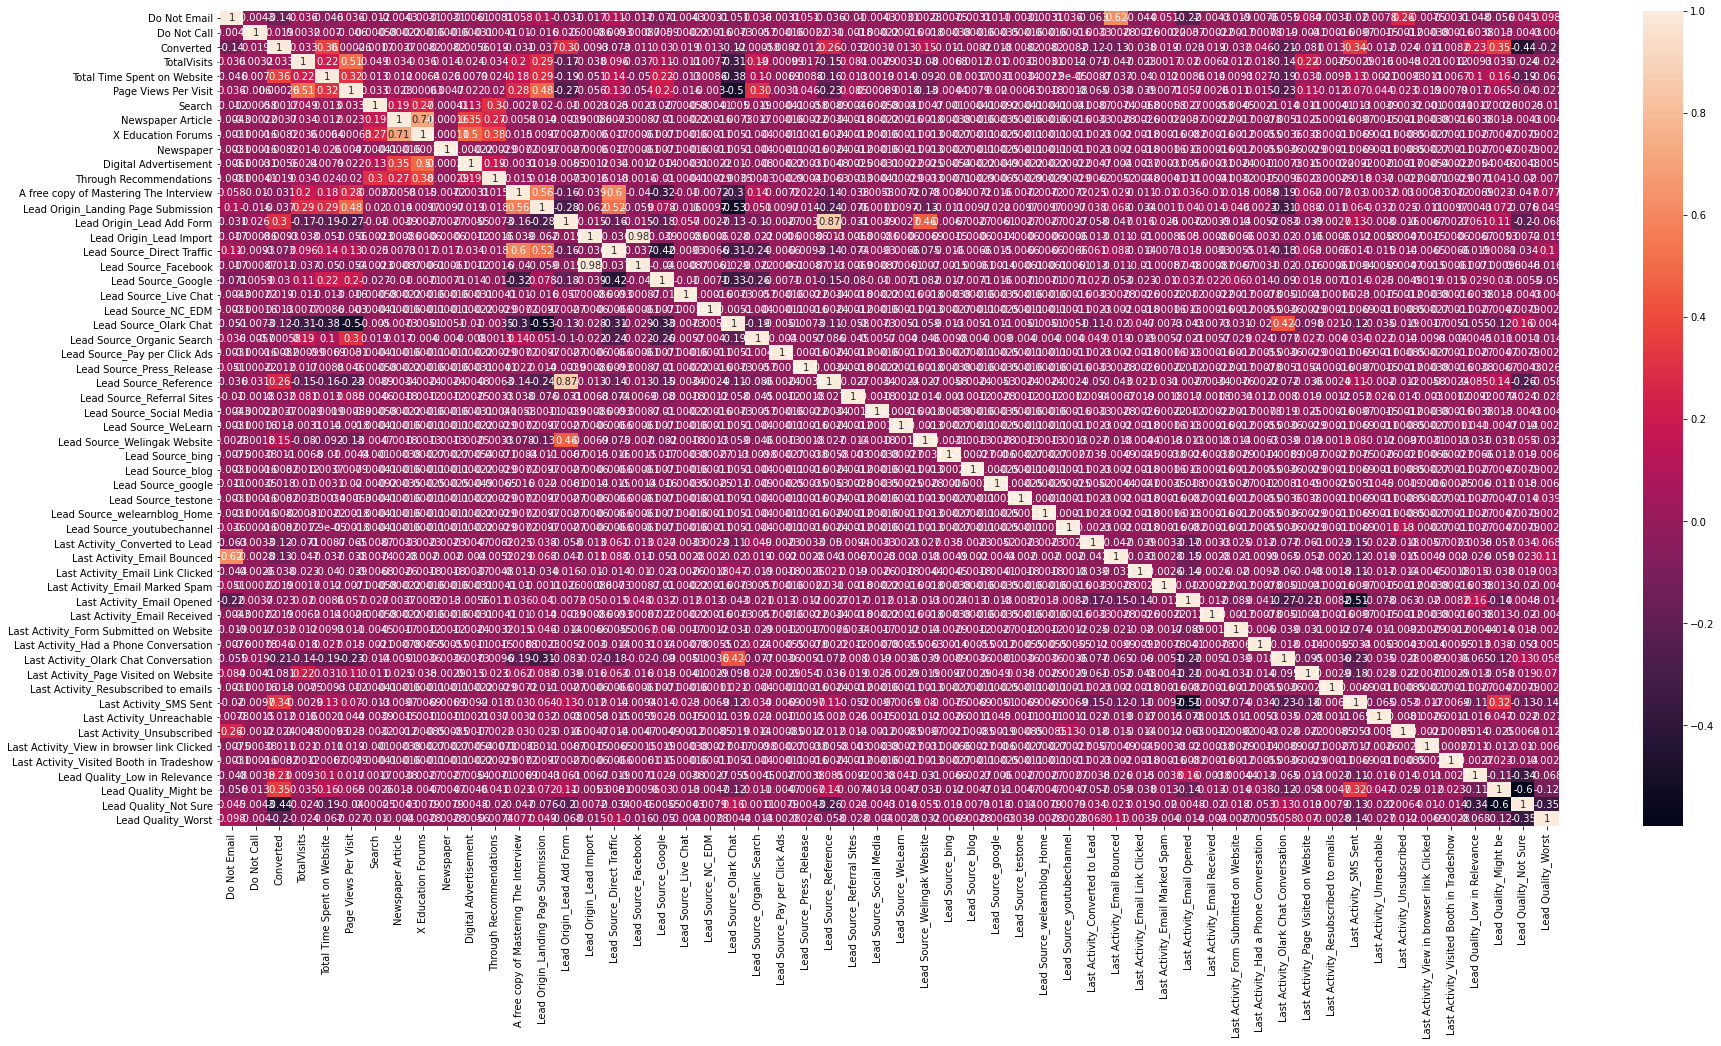

In [40]:
# Let's see the correlation matrix 

plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

`Features "Lead Origin_Lead Add Form","Lead Source_Reference" and "Lead Origin_Lead Import"` are having very `high correlation`

In [41]:
# Removing features that has very high correlation

X_test = X_test.drop(['Lead Origin_Lead Add Form','Lead Source_Reference','Lead Origin_Lead Import'], 1)
X_train = X_train.drop(['Lead Origin_Lead Add Form','Lead Source_Reference','Lead Origin_Lead Import'], 1)

## Step5 : Model Building

In [42]:
# importing statsmodels

import statsmodels.api as sm

In [43]:
# importing LogisticRegression

from sklearn.linear_model import LogisticRegression
leads_reg = LogisticRegression()

### Performing Recursive Feature Elimination

In [44]:
# importing rfe

from sklearn.feature_selection import RFE
rfe = RFE(leads_reg, 15)             
rfe = rfe.fit(X_train, y_train)

In [45]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False,  True, False, False,  True, False, False,  True, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False, False, False, False,  True,  True,  True])

In [46]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 5),
 ('TotalVisits', False, 30),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 29),
 ('Search', False, 10),
 ('Newspaper Article', False, 32),
 ('X Education Forums', False, 31),
 ('Newspaper', False, 11),
 ('Digital Advertisement', False, 33),
 ('Through Recommendations', False, 23),
 ('A free copy of Mastering The Interview', False, 37),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 16),
 ('Lead Source_NC_EDM', False, 22),
 ('Lead Source_Olark Chat', False, 3),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 24),
 ('Lead Source_Press_Release', False, 14),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 35),
 ('Lead Source_WeLearn', False, 38),
 ('Lead Source_Welingak Website', True, 1),


In [47]:
# variables shortlisted by RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Lead Source_google',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst'],
      dtype='object')

#### Running first Logistic regression model 

In [48]:
# Building Logistic regression model
import statsmodels.api as sm
X_train_sm_1 = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm_1, family = sm.families.Binomial())
res1 = logm1.fit()
print(res1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2237.1
Date:                Sun, 08 Aug 2021   Deviance:                       4474.2
Time:                        23:22:07   Pearson chi2:                 6.42e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

`Lead Source_google` column `need to be removed` because it has very `high p-value`

In [49]:
# Removing column 'Lead Source_google' as it has a high pvalue and hence is insignificant
col_2 = col.drop('Lead Source_google', 1)

##### Assessing the model with StatsModels

In [50]:
# Iteration 1
X_train_sm_2 = sm.add_constant(X_train[col_2])
logm2 = sm.GLM(y_train,X_train_sm_2, family = sm.families.Binomial())
res2 = logm2.fit()
print(res2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2240.1
Date:                Sun, 08 Aug 2021   Deviance:                       4480.3
Time:                        23:22:07   Pearson chi2:                 6.41e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

`All features` seems `significant` as `p-values` are well below `limit of 0.05` 

In [51]:
# Checking for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tabulate import tabulate

#### Checking VIF's

In [52]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_2].values, i) for i in range(X_train[col_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+----------------------------------------+-------+
| Features                               |   VIF |
|----------------------------------------+-------|
| Lead Quality_Not Sure                  |  3.78 |
| Lead Source_Google                     |  2.32 |
| Lead Source_Direct Traffic             |  2.27 |
| Lead Quality_Might be                  |  1.85 |
| Last Activity_SMS Sent                 |  1.72 |
| Lead Source_Organic Search             |  1.55 |
| Lead Quality_Worst                     |  1.35 |
| Total Time Spent on Website            |  1.34 |
| Last Activity_Olark Chat Conversation  |  1.31 |
| Do Not Email                           |  1.14 |
| Last Activity_Converted to Lead        |  1.11 |
| Lead Source_Welingak Website           |  1.07 |
| Lead Source_Referral Sites             |  1.05 |
| Last Activity_Had a Phone Conversation |  1.01 |
+----------------------------------------+-------+


In [53]:
# Getting the predicted values on the train set

y_train_pred = res2.predict(X_train_sm_2)
y_train_pred[:10]

3009    0.077477
1012    0.012755
9226    0.502890
4750    0.700212
7987    0.780128
1281    0.927243
2880    0.051172
4971    0.817858
7536    0.986250
1248    0.748025
dtype: float64

In [54]:
# Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07747708, 0.01275508, 0.50288997, 0.70021239, 0.78012842,
       0.92724266, 0.05117186, 0.81785823, 0.98624955, 0.74802476])

In [55]:
# Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.077477,3009
1,0,0.012755,1012
2,0,0.502890,9226
3,1,0.700212,4750
4,1,0.780128,7987


In [56]:
#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.077477,3009,0
1,0,0.012755,1012,0
2,0,0.502890,9226,1
3,1,0.700212,4750,1
4,1,0.780128,7987,1


In [57]:
from sklearn import metrics

In [58]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3461  444]
 [ 520 1926]]


In [59]:
# Checking the initial accuracy.
accuracy_initial = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print("Initial accuracy on train_df : " , accuracy_initial)

Initial accuracy on train_df :  0.8482128798614391


### Metrics beyond simply accuracy

In [60]:
# Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value
TP1 = confusion[1,1] # true positive 
TN1 = confusion[0,0] # true negatives
FP1 = confusion[0,1] # false positives
FN1 = confusion[1,0] # false negatives

In [61]:
# sensitivity of logistic regression model

sensitivity_initial = TP1 / float(TP1+FN1)
print("Initial sensitivity on train_df : " , sensitivity_initial)

Initial sensitivity on train_df :  0.7874080130825838


In [62]:
# calculate specificity

specificity_initial = TN1 / float(TN1+FP1)
print("Initial specificity on train_df : " , specificity_initial)

Initial specificity on train_df :  0.8862996158770806


In [63]:
# Calculate false postive rate - predicting non conversion when leads have converted
false_postive_rate_initial = FP1/ float(TN1+FP1)
print("Initial False Postive Rate on train_df : " , false_postive_rate_initial)

Initial False Postive Rate on train_df :  0.11370038412291933


In [64]:
# positive predictive value 
positive_predictive_value_initial = TP1 / float(TP1+FP1)
print("Initial positive predictive value on train_df : " , positive_predictive_value_initial)

Initial positive predictive value on train_df :  0.8126582278481013


In [65]:
# Negative predictive value
negative_predictive_value_initial = TN1 / float(TN1+ FN1)
print("Initial negative predictive value on train_df : " , negative_predictive_value_initial)

Initial negative predictive value on train_df :  0.8693795528761618


## Step 6: Plotting the ROC Curve

In [66]:
# Plotting the ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Curve', fontsize=15, pad=15)
    plt.legend(loc="lower right")
    plt.show()

    return None

In [67]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

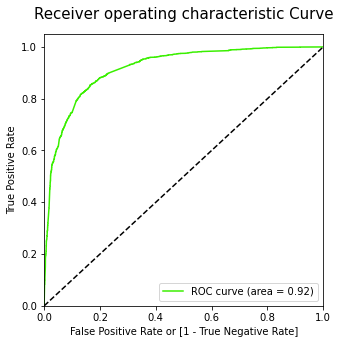

In [68]:
# Plotiing ROC (receiver operating characteristic) curce
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Step 7: Finding Optimal Cutoff Point

#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [69]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.077477,3009,0,1,0,0,0,0,0,0,0,0,0
1,0,0.012755,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.502890,9226,1,1,1,1,1,1,1,0,0,0,0
3,1,0.700212,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.780128,7987,1,1,1,1,1,1,1,1,1,0,0


In [70]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.727287  0.965249  0.578233
0.2   0.2  0.779877  0.934178  0.683227
0.3   0.3  0.835144  0.864677  0.816645
0.4   0.4  0.846009  0.825429  0.858899
0.5   0.5  0.848213  0.787408  0.886300
0.6   0.6  0.839080  0.704824  0.923175
0.7   0.7  0.821288  0.616926  0.949296
0.8   0.8  0.808849  0.551104  0.970294
0.9   0.9  0.748858  0.374489  0.983355


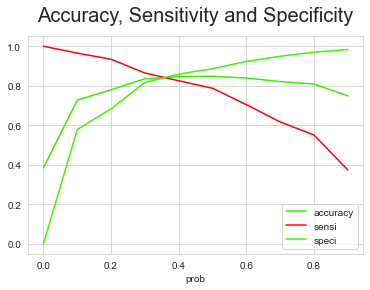

In [71]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style('whitegrid')
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title('Accuracy, Sensitivity and Specificity', fontsize=20, pad=15)
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [72]:
# final prediction using 0.35 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.077477,3009,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.012755,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.502890,9226,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.700212,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.780128,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [73]:
# Assigning lead Score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.077477,3009,0,1,0,0,0,0,0,0,0,0,0,0,8
1,0,0.012755,1012,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0,0.502890,9226,1,1,1,1,1,1,1,0,0,0,0,1,50
3,1,0.700212,4750,1,1,1,1,1,1,1,1,1,0,0,1,70
4,1,0.780128,7987,1,1,1,1,1,1,1,1,1,0,0,1,78


### `Accuracy Score` on `train_df`

In [74]:
# Let's check the overall accuracy.
accuracy_train = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(" Final Accuracy Score on train_df : " , round(accuracy_train,2))

 Final Accuracy Score on train_df :  0.84


In [75]:
confusion_train = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_train

array([[3274,  631],
       [ 378, 2068]], dtype=int64)

In [76]:
TP2 = confusion_train[1,1] # true positive 
TN2 = confusion_train[0,0] # true negatives
FP2 = confusion_train[0,1] # false positives
FN2 = confusion_train[1,0] # false negatives

### `Sensitivity` and `Specificity` on `train_df`

In [77]:
# Sensitivity of our "logistic regression model"
sensitivity_train = TP2 / float(TP2+FN2)
print("Sensitivity on train_df : " , round(sensitivity_train,2))

Sensitivity on train_df :  0.85


In [78]:
# Let us calculate specificity
specificity_train = TN2 / float(TN2+FP2)
print("Specificity on train_df : " , round(specificity_train,2))

Specificity on train_df :  0.84


In [79]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
false_postive_rate_train = FP2/ float(TN2+FP2)
print("False Postive Rate on train_df : " , round(false_postive_rate_train,2))

False Postive Rate on train_df :  0.16


In [80]:
# Positive predictive value
positive_predictive_value_train = TP2 / float(TP2+FP2)
print("Positive predictive value on train_df : " , round(positive_predictive_value_train,2))

Positive predictive value on train_df :  0.77


In [81]:
# Negative predictive value
negative_predictive_value_train = TN2 / float(TN2+ FN2)
print("Negative predictive value on train_df : " , round(negative_predictive_value_train,3))

Negative predictive value on train_df :  0.896


### `Precision` and `Recall` on `train_df`

In [82]:
# Metrics - Precision and Recall
from sklearn.metrics import precision_score, recall_score

In [83]:
# precision

precision_train = precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print("Precision on train_df :" , round(precision_train,2))

Precision on train_df : 0.81


In [84]:
# recall

recall_train = recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print("Recall on train_df :" , round(recall_train,2))

Recall on train_df : 0.79


### Precision and recall tradeoff

In [85]:
from sklearn.metrics import precision_recall_curve

In [86]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

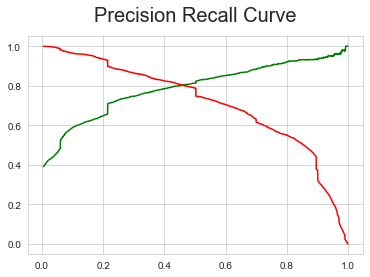

In [87]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision Recall Curve', fontsize=20, pad=15)
plt.show()

### Step 8: Making predictions on the test set

In [88]:
# Making predictions on the test set

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website', 'Page Views Per Visit']])

In [89]:
# test dataset
X_test = X_test[col_2]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
3271,0,-0.600595,0,1,0,0,0,0,0,0,0,0,1,0
1490,0,1.887326,1,0,0,0,0,0,0,0,0,0,0,0
7936,0,-0.752879,0,1,0,0,0,0,0,0,0,0,1,0
4216,0,-0.888650,0,0,0,0,0,0,0,0,0,0,0,0
3830,0,-0.587751,0,0,1,0,0,0,0,0,0,0,1,0


In [90]:
# adding constant as constant is not available in statsmodels
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,Do Not Email,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
3271,1.0,0,-0.600595,0,1,0,0,0,0,0,0,0,0,1,0
1490,1.0,0,1.887326,1,0,0,0,0,0,0,0,0,0,0,0
7936,1.0,0,-0.752879,0,1,0,0,0,0,0,0,0,0,1,0
4216,1.0,0,-0.888650,0,0,0,0,0,0,0,0,0,0,0,0
3830,1.0,0,-0.587751,0,0,1,0,0,0,0,0,0,0,1,0


In [91]:
# predicting
y_test_pred = res2.predict(X_test_sm)

In [92]:
y_test_pred[:10]

3271    0.068724
1490    0.965102
7936    0.058603
4216    0.901185
3830    0.055538
1800    0.676379
6507    0.205364
4821    0.130901
4223    0.971285
4714    0.502890
dtype: float64

In [93]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [94]:
y_pred_1.head()

,0
3271,0.068724
1490,0.965102
7936,0.058603
4216,0.901185
3830,0.055538


In [95]:
y_test_df = pd.DataFrame(y_test)

In [96]:
y_test_df['LeadId'] = y_test_df.index

In [97]:
# resetting index's
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [98]:
# pred final
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [99]:
y_pred_final.head()

,Converted,LeadId,0
0,0,3271,0.068724
1,1,1490,0.965102
2,0,7936,0.058603
3,1,4216,0.901185
4,0,3830,0.055538


In [100]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [101]:
y_pred_final.head()

,Converted,LeadId,Converted_prob
0,0,3271,0.068724
1,1,1490,0.965102
2,0,7936,0.058603
3,1,4216,0.901185
4,0,3830,0.055538


In [102]:
# Rearranging the columns
y_pred_final = y_pred_final[['LeadId','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [103]:
y_pred_final.head()

,LeadId,Converted,Converted_prob,Lead_Score
0,3271,0,0.068724,7
1,1490,1,0.965102,97
2,7936,0,0.058603,6
3,4216,1,0.901185,90
4,3830,0,0.055538,6


In [104]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [105]:
y_pred_final.sort_values(by=['Lead_Score'],ascending=False).head(5)

,LeadId,Converted,Converted_prob,Lead_Score,final_Predicted
2481,7053,1,0.995485,100,1
2565,5293,1,0.997094,100,1
1149,7970,1,0.995790,100,1
573,373,1,0.998920,100,1
868,2495,1,0.999136,100,1


### `Accuracy Score` on `test_df`

In [106]:
# Overall accuracy on test dataset
accuracy_test = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

print("Accuracy Score on test_df : " , round(accuracy_test,2))

Accuracy Score on test_df :  0.83


In [107]:
# confusion metrix on test dataset
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion_test

array([[1462,  272],
       [ 183,  806]], dtype=int64)

In [108]:
TP3 = confusion_test[1,1] # true positive 
TN3 = confusion_test[0,0] # true negatives
FP3 = confusion_test[0,1] # false positives
FN3 = confusion_test[1,0] # false negatives

### `Sensitivity` and `Specificity` on `test_df`

In [109]:
# Sensitivity
sensitivity_test = TP3 / float(TP3+FN3)
print("Sensitivity on test_df :" , round(sensitivity_test,2))

Sensitivity on test_df : 0.81


In [110]:
# specificity
specificity_test = TN3 / float(TN3+FP3)
print("Specificity on test_df :" , round(specificity_test,2))

Specificity on test_df : 0.84


### `Precision` and `Recall` on `test_df`

In [111]:
precision_test = precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)
print("Precision on test_df :" , round(precision_test,2))

Precision on test_df : 0.75


In [112]:
recall_test = recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)
print("Recall on test_df :" , round(recall_test,2))

Recall on test_df : 0.81


## Conclusion :

#### 1. Company should more focus on working professionals as they have enough budget to fund their courses and can afford it as well.
#### 2. Company should focus more on people who spend considerable amount of  time on there website browsing for the courses.
#### 3. They should also focus on people who have opted for ‘SMS’ and ‘E-mail’.
#### 4. Company should less focus on unemployed as they are unable to afford there courses.
#### 5. They should focus more on people who came through referrals of other candidates already enrolled.
#### 6. Target leads that comes from organic search from internet where Lead_source is organic search.